In [195]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# CSVファイルを読み込み、1行目をヘッダーとして指定
df_left = pd.read_csv(r'C:\WorkSpace\B_analysis\SensorData\nagashio_f_left_foot_data.csv', header=0)

In [196]:
df_right = pd.read_csv(r'C:\WorkSpace\B_analysis\SensorData\nagashio_f_right_foot_data.csv', header=0)

In [197]:
# ElapsedTime以外のカラムを選択し、値が10以下の場合に0に変更
df_left[df_left.columns.difference(["ElapsedTime"])] = df_left[df_left.columns.difference(["ElapsedTime"])].applymap(lambda x: 0 if x <= 10 else x)
df_right[df_right.columns.difference(["ElapsedTime"])] = df_right[df_right.columns.difference(["ElapsedTime"])].applymap(lambda x: 0 if x <= 10 else x)

C:\Users\hidex\AppData\Local\Temp\ipykernel_25420\2220133750.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_left[df_left.columns.difference(["ElapsedTime"])] = df_left[df_left.columns.difference(["ElapsedTime"])].applymap(lambda x: 0 if x <= 10 else x)
C:\Users\hidex\AppData\Local\Temp\ipykernel_25420\2220133750.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_right[df_right.columns.difference(["ElapsedTime"])] = df_right[df_right.columns.difference(["ElapsedTime"])].applymap(lambda x: 0 if x <= 10 else x)


In [198]:
# ローパスフィルタの設計
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  # ナイキスト周波数
    normal_cutoff = cutoff / nyquist  # 正規化カットオフ周波数
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # フィルタ係数
    return b, a

# データにローパスフィルタを適用
def apply_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)
    return filtfilt(b, a, data)

# サンプリング周波数 fs（例：100 Hz などの値を使用）
fs = 100  # サンプリング周波数の設定

# df_left の各列にローパスフィルタを適用（ElapsedTime を除く）
for column in df_left.columns:
    if column != 'ElapsedTime':  # 'ElapsedTime' カラムを除外
        # フィルタを適用
        df_left[column] = apply_lowpass_filter(df_left[column], cutoff=25, fs=fs)
        # 数値が0以下にならないように設定
        df_left[column] = np.maximum(df_left[column], 0)  # 0より小さい値は0に置き換え

# df_right の各列にローパスフィルタを適用（ElapsedTime を除く）
for column in df_right.columns:
    if column != 'ElapsedTime':  # 'ElapsedTime' カラムを除外
        # フィルタを適用
        df_right[column] = apply_lowpass_filter(df_right[column], cutoff=25, fs=fs)
        # 数値が0以下にならないように設定
        df_right[column] = np.maximum(df_right[column], 0)  # 0より小さい値は0に置き換え

C:\Users\hidex\AppData\Local\Temp\ipykernel_25420\516762092.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend ()


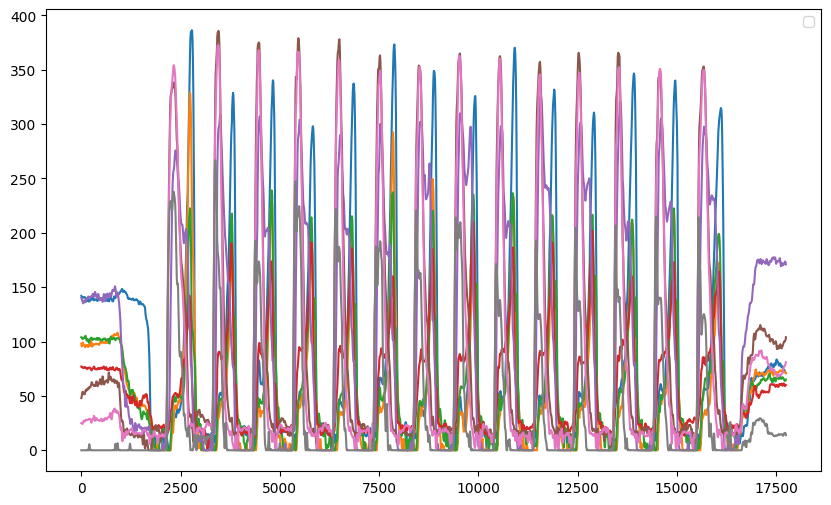

In [199]:
plt.figure(figsize=(10, 6))
for cloumn in df_left.columns[1:]:
    plt.plot(df_left["ElapsedTime"], df_left[cloumn])
    plt.legend ()

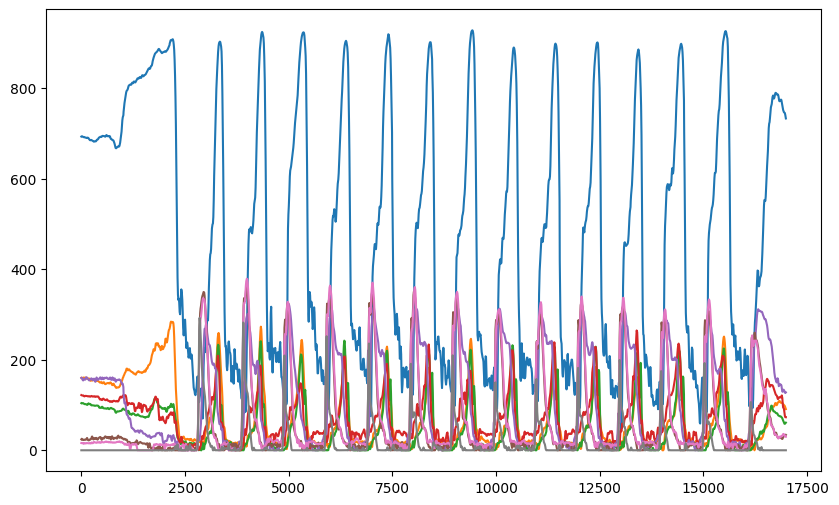

In [200]:
plt.figure(figsize=(10, 6))
for cloumn in df_right.columns[1:]:
    plt.plot(df_right["ElapsedTime"], df_right[cloumn])

In [201]:
df_merged = pd.merge(df_left, df_right, on='ElapsedTime', how='outer')
df_merged = df_merged.interpolate(method='linear', axis=0)
df_merged.head(20)

,ElapsedTime,Left_Foot_1,Left_Foot_2,Left_Foot_3,Left_Foot_4,Left_Foot_5,Left_Foot_6,Left_Foot_7,Left_Foot_8,Right_Foot_1,Right_Foot_2,Right_Foot_3,Right_Foot_4,Right_Foot_5,Right_Foot_6,Right_Foot_7,Right_Foot_8
0,0,141.999187,98.000109,104.000238,76.999864,140.000267,48.000032,24.999850,0.000000e+00,693.000471,159.998970,104.000694,122.000356,159.999619,24.000507,15.999903,3.661836e-38
1,10,141.620587,95.527790,103.772003,77.012820,139.004233,49.672031,24.795844,1.950393e-14,693.639432,158.802508,103.396920,121.477480,160.389904,25.484049,15.721328,7.559922e-38
2,20,140.722502,96.618457,102.997867,76.402965,137.842477,52.157731,24.315355,3.139723e-03,693.556476,158.921533,103.736261,120.954942,158.344156,24.730120,15.988582,0.000000e+00
3,33,140.060079,98.973468,102.321340,75.866184,136.488147,53.883782,24.269847,0.000000e+00,693.102464,159.352782,104.008669,120.953127,156.794323,23.862165,15.936756,0.000000e+00
4,34,140.187081,98.986317,102.464859,75.923195,135.908002,53.713682,24.805106,0.000000e+00,692.648453,159.784030,104.281077,120.951312,155.244489,22.994210,15.884930,0.000000e+00
5,43,140.314084,98.999166,102.608377,75.980206,135.327858,53.543583,25.340366,0.000000e+00,692.181894,160.056007,104.168938,121.091944,154.760791,22.825003,15.404462,9.185410e-38
6,44,140.562820,98.273363,103.018225,76.019461,135.229508,52.985439,26.053003,4.892223e-14,691.715335,160.327984,104.056799,121.232577,154.277092,22.655796,14.923995,1.837082e-37
7,53,140.811557,97.547560,103.428072,76.058716,135.131159,52.427296,26.765640,9.784446e-14,691.678955,160.470784,103.680986,120.990717,155.145728,22.988894,14.617799,2.814884e-37
8,54,140.842579,97.197299,103.517327,75.905909,135.656744,52.161370,26.989837,7.875736e-03,691.642576,160.613583,103.305173,120.748858,156.014363,23.321991,14.311604,3.792687e-37
9,63,140.873601,96.847037,103.606581,75.753101,136.182330,51.895444,27.214034,1.575147e-02,691.852205,160.685150,102.947603,120.168332,157.009318,23.284279,14.615029,1.896343e-37


In [202]:
# 定数 R を定義
R = 180

# 新しいデータフレームを作成
df_calculated = df_merged.copy()
for column in df_calculated.columns:
    if column != "ElapsedTime":
        # 与えられた式を適用
        df_calculated[column] = 1000 * df_calculated[column] / ((1023 - df_calculated[column])  * R)

In [203]:
coefficients = {
    "Right_Foot_1": 0.22497882,
    "Right_Foot_2": 4.219779047,
    "Right_Foot_3": 4.309939138,
    "Right_Foot_4": 4.593853313,
    "Right_Foot_5": 4.248982725,
    "Right_Foot_6": 4.973555078,
    "Right_Foot_7": 3.462631472,
    "Right_Foot_8": 4.772374839,
    "Left_Foot_1": 3.966326901,
    "Left_Foot_2": 4.744929171,
    "Left_Foot_3": 4.15168471,
    "Left_Foot_4": 4.56279606,
    "Left_Foot_5": 4.079466017,
    "Left_Foot_6": 3.484332969,
    "Left_Foot_7": 4.341571247,
    "Left_Foot_8": 5.130518067,
}

# 定義
D = 9.5 / 1000  # mmからmに変換
area = np.pi * (D / 2)**2  # 面積の計算

# 各列に係数を適用,圧力を計算
for col, coeff in coefficients.items():
    df_calculated[col] = df_calculated[col] * coeff
    df_calculated[col] = df_calculated[col] / area / 1000

In [204]:
# 各足の位置情報（x, y座標）
positions = {
    "Right_Foot_1": (27, 218),
    "Right_Foot_2": (23, 183),
    "Right_Foot_3": (46, 182),
    "Right_Foot_4": (74, 176),
    "Right_Foot_5": (74, 111),
    "Right_Foot_6": (64, 52),
    "Right_Foot_7": (38, 44),
    "Right_Foot_8": (50, 19),
    "Left_Foot_1": (-27, 218),
    "Left_Foot_2": (-23, 183),
    "Left_Foot_3": (-46, 182),
    "Left_Foot_4": (-74, 176),
    "Left_Foot_5": (-74, 111),
    "Left_Foot_6": (-64, 52),
    "Left_Foot_7": (-38, 44),
    "Left_Foot_8": (-50, 19),
}

# COPx と COPy を計算
def calculate_COP(df, coefficients, positions):
    COPx = 0
    COPy = 0
    total_force = 0

    # 各足の位置と力を使って重心位置を計算
    for foot, (x_pos, y_pos) in positions.items():
        force = df[foot] * coefficients[foot]
        COPx += force * x_pos
        COPy += force * y_pos
        total_force += force

    COPx /= total_force
    COPy /= total_force
    return COPx, COPy

# df_calculated に COPx と COPy を追加
df_calculated["COPx"], df_calculated["COPy"] = zip(*df_calculated.apply(lambda row: calculate_COP(row, coefficients, positions), axis=1))

# CSVファイルに保存
df_calculated.to_csv(r'C:\WorkSpace\B_analysis\foot_data.csv', index=False, encoding='utf-8-sig')

C:\Users\hidex\AppData\Local\Temp\ipykernel_25420\3602004153.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

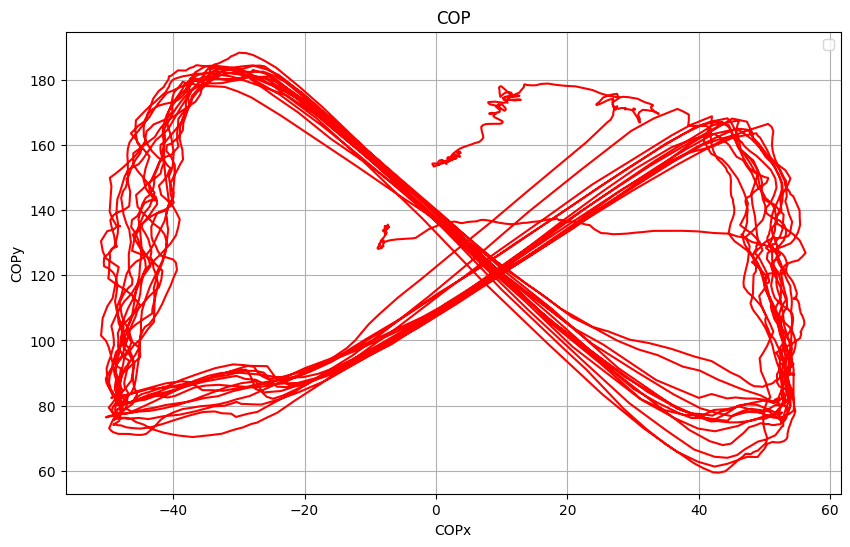

In [205]:
# 1. ElapsedTime と各足の値（Right_Foot_1, Right_Foot_2, ..., Left_Foot_3）をプロット
plt.figure(figsize=(10, 6))

# # Right_Foot と Left_Foot の値をそれぞれプロット
# for i in range(4, 5):
#     plt.plot(df_calculated["ElapsedTime"], df_calculated[f"Right_Foot_{i}"], label=f"Right_Foot_{i}")
# # for i in range(8, 9):
# #     plt.plot(df_calculated["ElapsedTime"], df_calculated[f"Left_Foot_{i}"], label=f"Left_Foot_{i}")

# plt.xlabel("Elapsed Time (s)")
# plt.ylabel("Foot Values")
# plt.title("Foot Values")
# plt.legend()
# plt.grid(True)
# plt.show()

# 2. COPx と COPy を時間軸に対してプロット
plt.figure(figsize=(10, 6))
plt.plot(df_calculated["COPx"], df_calculated["COPy"], color="red")
plt.xlabel("COPx")
plt.ylabel("COPy")
plt.title("COP")
plt.legend()
plt.grid(True)
plt.show()


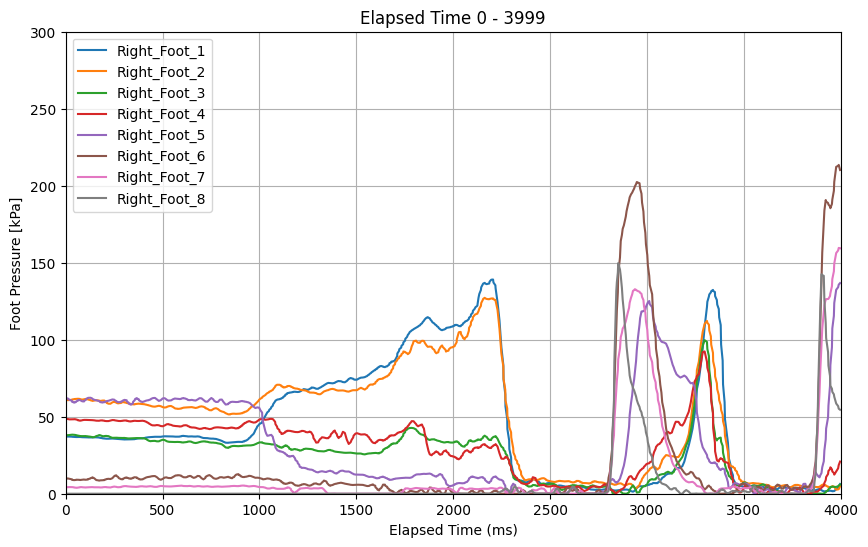

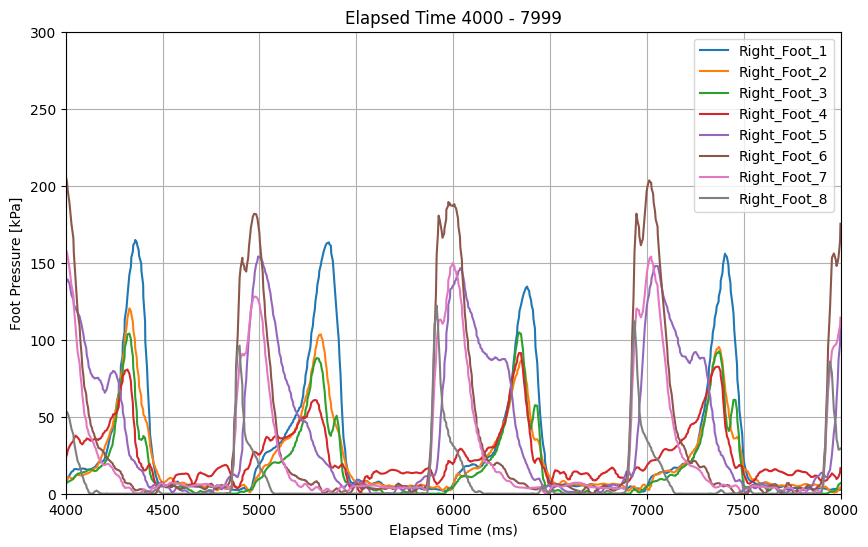

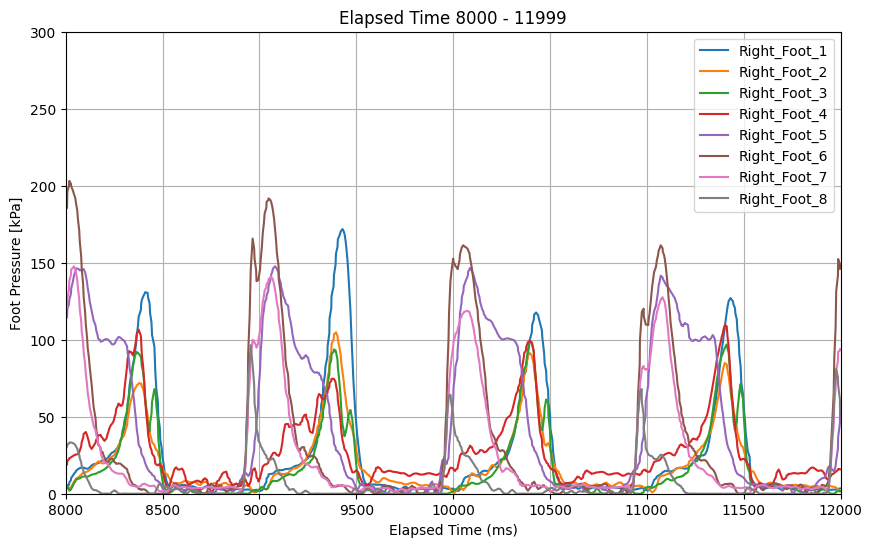

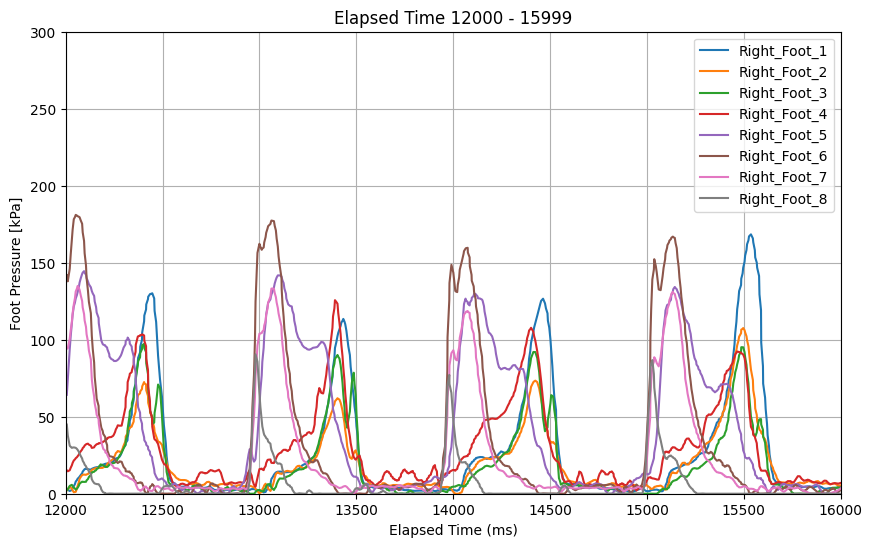

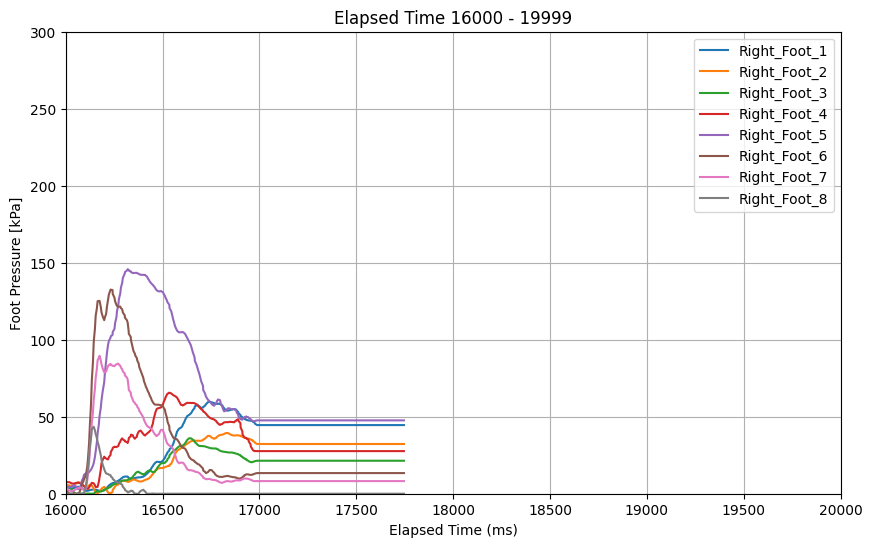

In [206]:
# ElapsedTimeを1000ごとの区間で分割してグラフを表示
step = 4000
max_time = int(df_calculated["ElapsedTime"].max())

# 区間ごとにグラフを描画
for start in range(0, max_time + 1, step):
    end = start + step
    subset = df_calculated[(df_calculated["ElapsedTime"] >= start) & (df_calculated["ElapsedTime"] < end)]
    
    if subset.empty:
        continue

    # 1. Right_Foot  の値をプロット
    plt.figure(figsize=(10, 6))
    for i in range(1, 9):
        plt.plot(
            subset["ElapsedTime"],
            subset[f"Right_Foot_{i}"],
            label=f"Right_Foot_{i}",
        )
    # for i in range(1, 9):
    #     plt.plot(
    #         subset["ElapsedTime"],
    #         subset[f"Left_Foot_{i}"],
    #         label=f"Left_Foot_{i}"
    #     )
    plt.xlim(start, end)
    plt.ylim(0, 300)
    plt. legend ()
    plt.xlabel("Elapsed Time (ms)")
    plt.ylabel("Foot Pressure [kPa]")
    plt.title(f"Elapsed Time {start} - {end - 1}")
    plt.grid(True)
    plt.show()




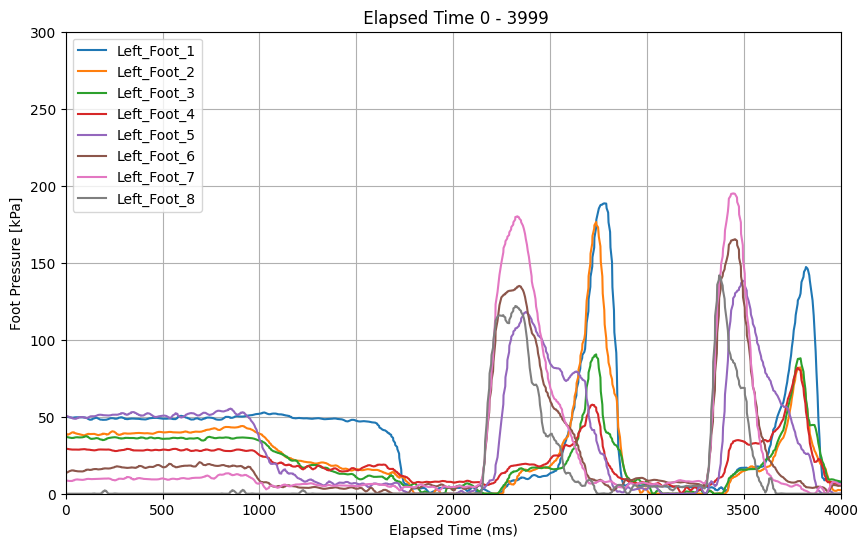

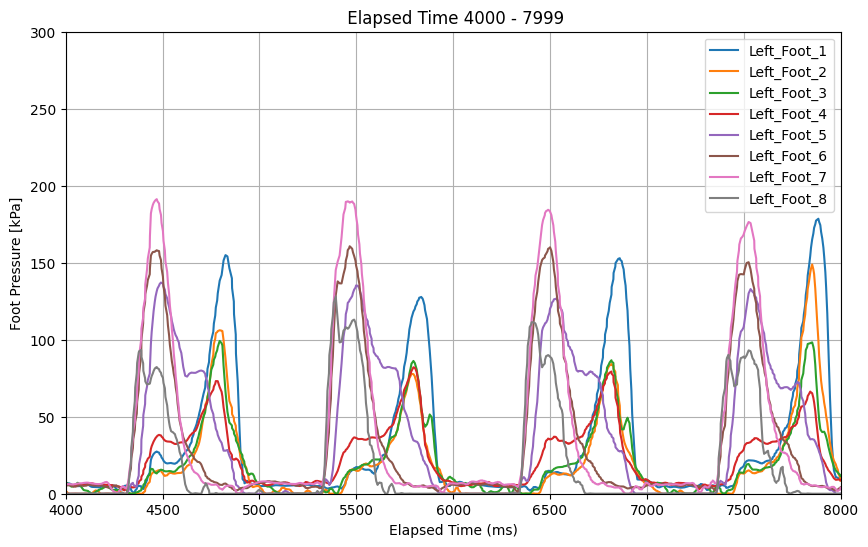

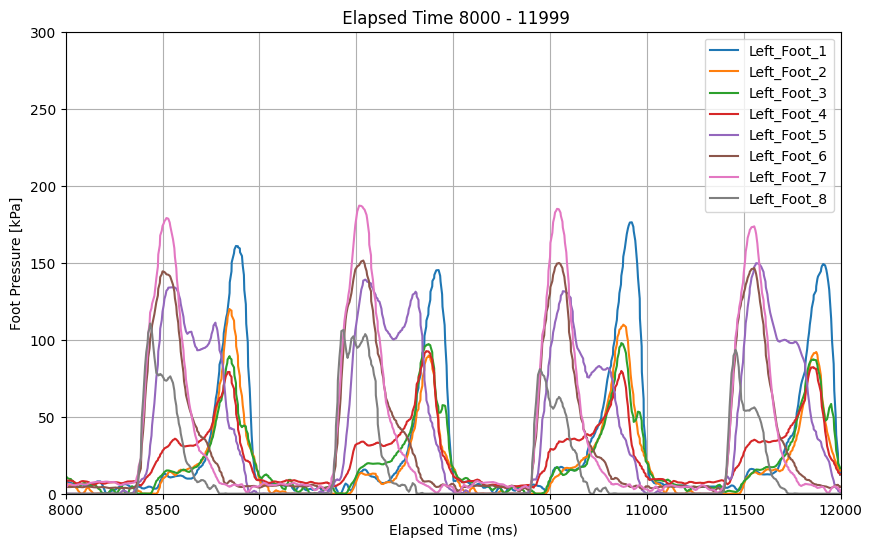

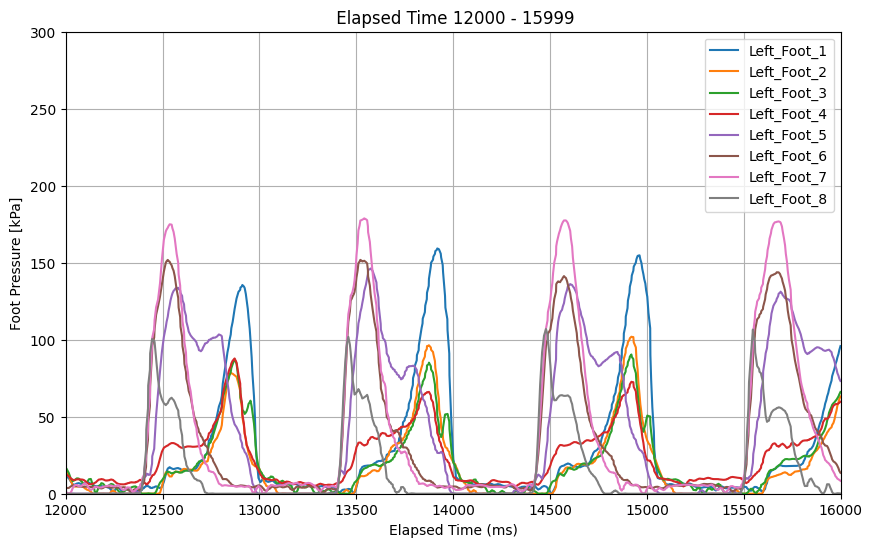

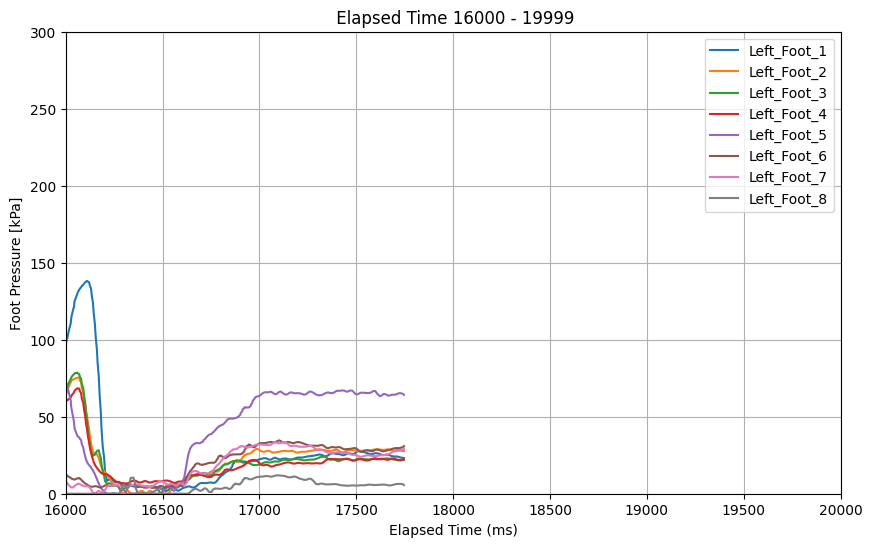

In [207]:
# ElapsedTimeを1000ごとの区間で分割してグラフを表示
step = 4000
max_time = int(df_calculated["ElapsedTime"].max())

# 区間ごとにグラフを描画
for start in range(0, max_time + 1, step):
    end = start + step
    subset = df_calculated[(df_calculated["ElapsedTime"] >= start) & (df_calculated["ElapsedTime"] < end)]
    
    if subset.empty:
        continue

    # 1. Left_Foot の値をプロット
    plt.figure(figsize=(10, 6))
    # for i in range(1, 9):
    #     plt.plot(
    #         subset["ElapsedTime"],
    #         subset[f"Right_Foot_{i}"],
    #         label=f"Right_Foot_{i}",
    #     )
    for i in range(1, 9):
        plt.plot(
            subset["ElapsedTime"],
            subset[f"Left_Foot_{i}"],
            label=f"Left_Foot_{i}"
        )

    plt.xlim(start, end)
    plt.ylim(0, 300)
    plt. legend ()
    plt.xlabel("Elapsed Time (ms)")
    plt.ylabel("Foot Pressure [kPa]")
    plt.title(f" Elapsed Time {start} - {end - 1}")
    plt.grid(True)
    plt.show()


